 # Import Packages

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cPickle
sns.set(style='white',palette='muted',color_codes=True)
%matplotlib inline

# Unpickle data

In [119]:
#Functiion for unpickle the data.
def unpickle(f):
    fo = open(f,'rb')
    d = cPickle.load(fo)
    fo.close()
    return d

# Load CIFAR-10 dataset

In [17]:
def load_cifar10(dir):
    train_data=[]
    train_target=[]
    
    for i in range(1,6):
        d = unpickle('%s/data_batch_%d' %(dir,i))
        train_data.extend(d['data'])
        train_target.extend(d['labels'])
        
    d = unpickle('%s/test_batch' %(dir))
    test_data = d['data']
    test_target = d['labels']
    
    train_data = np.array(train_data,dtype=np.float32)
    train_target = np.array(train_target,dtype=np.int32)
    test_data = np.array(test_data,dtype=np.float32)
    test_target = np.array(test_target,dtype=np.int32)
    
    train_data /=255.0
    test_data /=255.0
    
    return train_data,test_data,train_target,test_target

In [18]:
X_train,X_test,y_train,y_test = load_cifar10("cifar-10-batches-py")

In [19]:
X_train = X_train.reshape((len(X_train),3,32,32))
X_test = X_test.reshape((len(X_test),3,32,32))

(0, 6000)

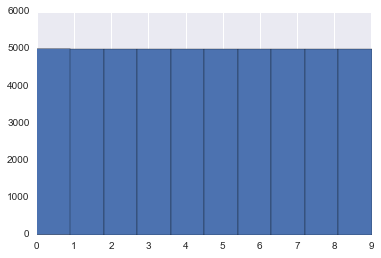

In [24]:
plt.hist(y_train)
plt.xlim(0,9)
plt.ylim(0,6000)

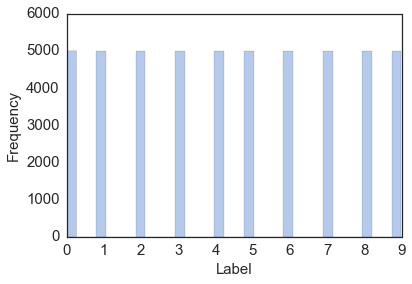

In [55]:
sns.distplot(y_train,kde=False,rug=False,color='b')
plt.ylim(0,6000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Distribution of Training Data',fontsize=15)

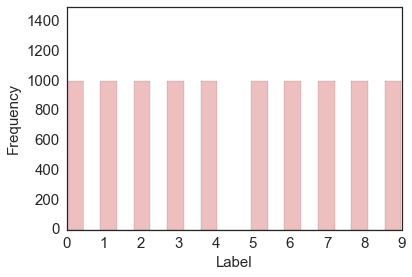

In [56]:
sns.distplot(y_test,kde=False,rug=False,color='r')
plt.ylim(0,1500)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title("Distribution of Test Data",fontsize=15)

In [74]:
from keras.utils import np_utils
nb_classes =10

#Change the target values into one-hot vectors 
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [75]:
y_test
#y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

# Import Deep Learning Library

In [101]:
from keras.models import Sequential
from keras.layers import Dense,Activation,MaxPooling2D,Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
from keras import backend as K
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot, plot

# Model 1

In [120]:
batch_size = 32
nb_classes = 10
nb_epoch = 20
nb_filters=32
model = Sequential()
model.add(Convolution2D(nb_filters,3,3,border_mode='same',input_shape=(3,32,32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model.add(Dense(output_dim=nb_classes,input_dim=512))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



In [121]:
res = model.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 95s - loss: 1.4670 - acc: 0.4749 - val_loss: 1.2792 - val_acc: 0.5541
Epoch 2/20
50000/50000 [==============================] - 95s - loss: 1.1078 - acc: 0.6109 - val_loss: 1.0973 - val_acc: 0.6111
Epoch 3/20
50000/50000 [==============================] - 95s - loss: 0.9239 - acc: 0.6749 - val_loss: 1.0559 - val_acc: 0.6326
Epoch 4/20
50000/50000 [==============================] - 96s - loss: 0.7595 - acc: 0.7337 - val_loss: 1.0463 - val_acc: 0.6423
Epoch 5/20
50000/50000 [==============================] - 96s - loss: 0.5923 - acc: 0.7933 - val_loss: 1.1045 - val_acc: 0.6520
Epoch 6/20
50000/50000 [==============================] - 96s - loss: 0.4291 - acc: 0.8521 - val_loss: 1.1924 - val_acc: 0.6489
Epoch 7/20
50000/50000 [==============================] - 94s - loss: 0.2905 - acc: 0.9006 - val_loss: 1.3250 - val_acc: 0.6482
Epoch 8/20
50000/50000 [==============================

In [122]:
res.history['acc']

[0.47492000000000001,
 0.61092000000000002,
 0.67486000000000002,
 0.73365999999999998,
 0.79330000000000001,
 0.85211999999999999,
 0.90061999999999998,
 0.93262,
 0.95382,
 0.96911999999999998,
 0.97846,
 0.98063999999999996,
 0.98185999999999996,
 0.98807999999999996,
 0.99304000000000003,
 0.9909,
 0.99646000000000001,
 0.99850000000000005,
 0.99946000000000002,
 0.99985999999999997]

In [123]:
res.history['val_acc']

[0.55410000000000004,
 0.61109999999999998,
 0.63260000000000005,
 0.64229999999999998,
 0.65200000000000002,
 0.64890000000000003,
 0.6482,
 0.65490000000000004,
 0.65629999999999999,
 0.65790000000000004,
 0.65290000000000004,
 0.65190000000000003,
 0.64359999999999995,
 0.66439999999999999,
 0.64990000000000003,
 0.66000000000000003,
 0.66820000000000002,
 0.67190000000000005,
 0.67659999999999998,
 0.6764]

In [124]:
res.history

{'acc': [0.47492000000000001,
  0.61092000000000002,
  0.67486000000000002,
  0.73365999999999998,
  0.79330000000000001,
  0.85211999999999999,
  0.90061999999999998,
  0.93262,
  0.95382,
  0.96911999999999998,
  0.97846,
  0.98063999999999996,
  0.98185999999999996,
  0.98807999999999996,
  0.99304000000000003,
  0.9909,
  0.99646000000000001,
  0.99850000000000005,
  0.99946000000000002,
  0.99985999999999997],
 'loss': [1.4669524943923951,
  1.1078222452163697,
  0.92394950201034542,
  0.75946547008514409,
  0.59225330893993378,
  0.42905663615226747,
  0.29053984926462173,
  0.20016157974600793,
  0.14119356430470945,
  0.099113919003009796,
  0.071057141507267954,
  0.064161025527864693,
  0.058295679935365913,
  0.042391571484878661,
  0.02474322745811194,
  0.029892207865938544,
  0.015133182902159169,
  0.0083411476017953828,
  0.0031803399879671633,
  0.0015272969152592122],
 'val_acc': [0.55410000000000004,
  0.61109999999999998,
  0.63260000000000005,
  0.64229999999999998

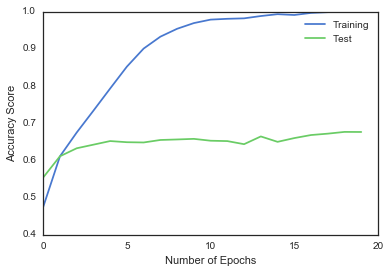

In [125]:
x=range(nb_epoch)
plt.plot(x,res.history['acc'],label='Training')
plt.plot(x,res.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

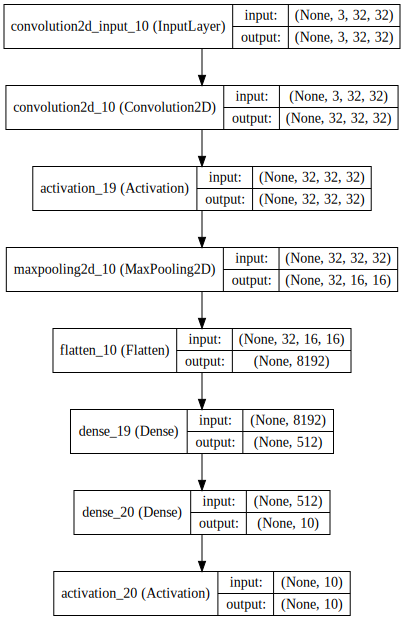

In [126]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Model 2

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(X_train, y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, y_test))

In [ ]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

In [ ]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Model 3

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model2.add(Dense(output_dim=10,input_dim=512))
model2.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

In [ ]:
SVG(model_to_dot(model2).create(prog='dot', format='svg'))